# Week 12: 

**DATA110**
*Brian Roepke*

Unsupervised Learning: Clustering wine origin given chemical makeup

1. Perform general EDA 

1. Perform clustering analysis using:  

    - K-Means and 

    - Hierarchical Agglomerative clustering 

    - Apply techniques for identifying the best number of clusters (eg: elbow method and dendogram)

    - Create models and show a scatter plot with cluster assignments.

    - Evaluate performance metrics from sklearn.metrics: 

        - homogeneity_score,

        - completeness_score,

        - adjusted_rand_score, 

        - silhouette_score.

Note: because these are unsupervised, ML, algorithms, you need to exclude the class label during modeling. You also need to normalize/scale your features. 

Refer to the following as well as conduct your own research.

1. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
1. https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
1. https://scikit-learn.org/stable/modules/clustering.html
1. https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics

In [138]:
import numpy as np
import pandas as pd
from time import time
import warnings
warnings.filterwarnings('ignore')


from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import MinMaxScaler



import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [139]:
df = pd.read_csv("wine.csv")
df.head()

,Class,Alcohol,Malic acid,Ash,Ash Alcalinity,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Ash Alcalinity        178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280/OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [141]:
df.shape

(178, 14)

In [142]:
# check for nan/null
df.isnull().values.any()

False

In [143]:
df['Class'].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [144]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Ash Alcalinity,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [145]:
len_before = df.shape[0]
df.drop_duplicates(inplace=True)
len_after = df.shape[0]

print("Before =", len_before)
# drop duplicates
print("After =", len_after)
print('')
print("Total Removed =", len_before - len_after)

Before = 178
After = 178

Total Removed = 0


# EDA

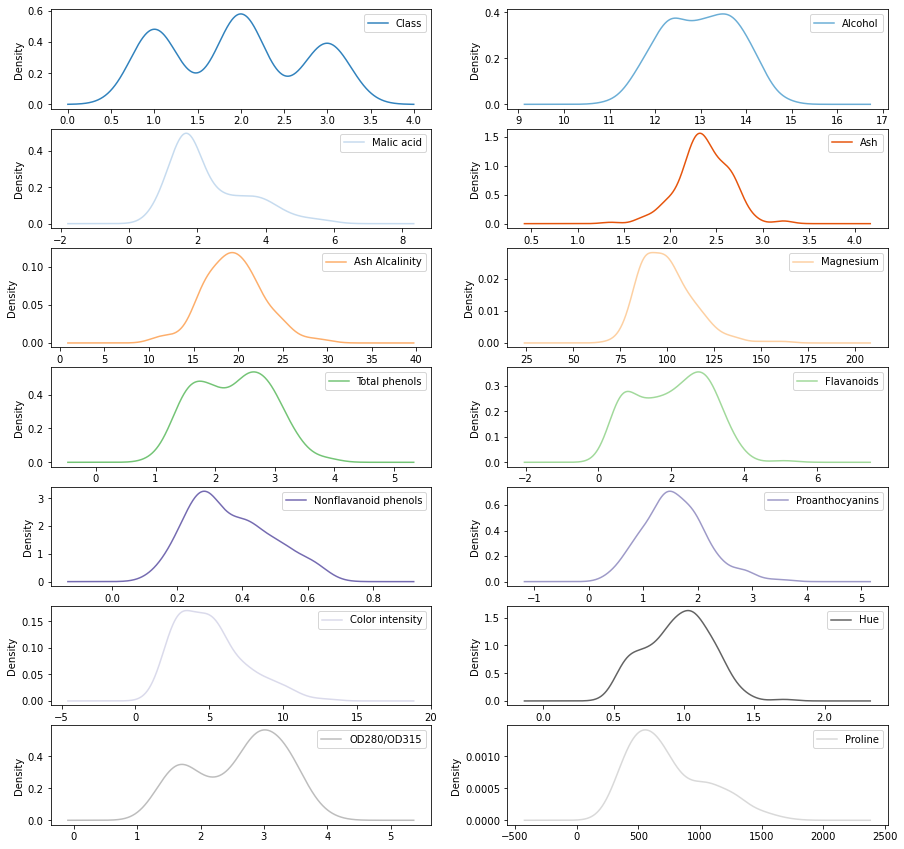

In [146]:
df.plot(figsize=(15,15), kind='kde', subplots=True, layout=(7,2), sharex=False, cmap='tab20c');

In [162]:
# Function to print the number of outliers in a column.
def get_outliers(df):
    '''Function to identify the number of outliers +/- 3 standard deviations outside of mean.
    Pass this function a dataframe and it returns a dictionary'''
    
    outs = {}
    
    for col in df.columns:
        
        # calculate summary statistics
        data_mean, data_std = np.mean(df[col]), np.std(df[col])
        
        # identify outliers
        cut_off = data_std * 3
        lower, upper = data_mean - cut_off, data_mean + cut_off
        
        # identify outliers
        outliers = [x for x in df[col] if x < lower or x > upper]
        
        outs[col] = len(outliers)
        
    return outs

In [163]:
get_outliers(df)

{'Class': 0,
 'Alcohol': 0,
 'Malic acid': 1,
 'Ash': 3,
 'Ash Alcalinity': 1,
 'Magnesium': 2,
 'Total phenols': 0,
 'Flavanoids': 1,
 'Nonflavanoid phenols': 0,
 'Proanthocyanins': 1,
 'Color intensity': 1,
 'Hue': 1,
 'OD280/OD315': 0,
 'Proline': 0}

**Notes:**

There are only a very small number of outliers (outside of `+/-3` standard deviations.  No action will be taken to remove them.

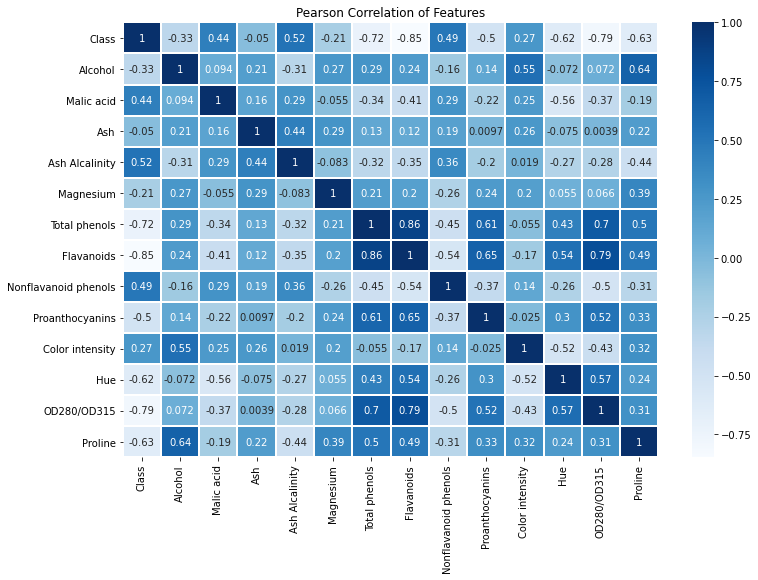

In [60]:
# using seaboarn to plot correlation heat map
corr = df.corr()

f, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(corr, cmap="Blues", annot=True, square=False, ax=ax,  linewidth = 1)
plt.title('Pearson Correlation of Features')
plt.yticks(rotation=0);

### Data Setup

 - create a `labels` variable from the `Class`
 - drop the `Class` from the dataset and create a new variable called `data` with that.
 - Use the `MinMaxScaler` from sklearn to normalize the data.


In [61]:
labels = df['Class'].copy()
data = df.drop(columns=['Class']).copy()

In [62]:
mms = MinMaxScaler()
mms.fit(data)
data = mms.transform(data)
# Show five rows of the rescaled data
data[:1]

array([[0.84210526, 0.1916996 , 0.57219251, 0.25773196, 0.61956522,
        0.62758621, 0.57383966, 0.28301887, 0.59305994, 0.37201365,
        0.45528455, 0.97069597, 0.56134094]])

# Determine the Optimal Number of Clusters

## Elbow Method

To select the best number of clusters, we'll use the Elbow method.  Per [Wikipedia](https://en.wikipedia.org/wiki/Elbow_method_(clustering))

> *In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use. The same method can be used to choose the number of parameters in other data-driven models, such as the number of principal components to describe a data set.*

[Tutorial: How to determine the optimal number of clusters for k-means clustering](https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f)

In [63]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)

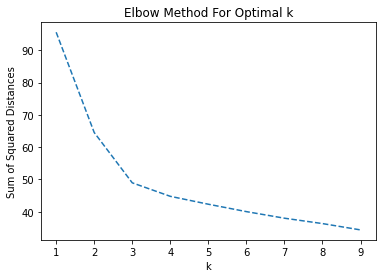

In [64]:
ax = sns.lineplot(x=K, y=Sum_of_squared_distances)
ax.lines[0].set_linestyle("--")
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**Conclusion:** Based on this method, the appropriate number of clusters is `3`. The elbow is observed by the line's flattening representing the sum of square distances between cluster centers. 

Of course, this is something we already knew from the dataset since it was labeled with species. However, this nicely demonstrates this method.

## Dendrogram

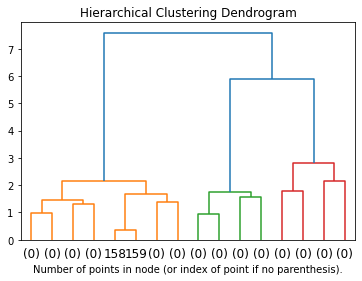

In [65]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0]) 
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples: 
                current_count += 1 # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count
    
    linkage_matrix = np.column_stack([model.children_, model.distances_,counts]).astype(float) 
    
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

X = data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None) 
model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3, show_leaf_counts=True)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show();

## Set the Best k

In [66]:
k = 3

# Clustering

In [67]:
def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.
    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time] #, estimator[-1].inertia_
    
    # Define the metrics which require only the true labels and estimator # labels
    clustering_metrics = [
            metrics.homogeneity_score,
            metrics.completeness_score,
            metrics.v_measure_score,
            metrics.adjusted_rand_score,
            metrics.adjusted_mutual_info_score,]
    
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]
    
    # The silhouette score requires the full dataset
    results += [metrics.silhouette_score(data, estimator[-1].labels_, metric="euclidean", sample_size=300,)]
    
    # Show the results
    # formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}" "\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
    formatter_result = ("{:9s}\t{:.3f}s\t{:.3f}\t{:.3f}" "\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

In [68]:
from sklearn.cluster import AffinityPropagation

print(82 * '_') 
print('init\t\ttime\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

kmeans = KMeans(init="k-means++", n_clusters=k, n_init=5,random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=k, n_init=5, random_state=0)
bench_k_means(kmeans=kmeans, name="Random", data=data, labels=labels)

pca = PCA(n_components=k).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=k, n_init=5, random_state=0)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')
bench_k_means(kmeans=agglo, name="Agglo", data=data, labels=labels)

sc = SpectralClustering(n_clusters=k)
bench_k_means(kmeans=sc, name="Spectral", data=data, labels=labels)

aff = AffinityPropagation()
bench_k_means(kmeans=aff, name="Affinity", data=data, labels=labels)

print(82 * '_')

__________________________________________________________________________________
init		time	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.023s	0.846	0.837	0.842	0.854	0.840	0.301
Random   	0.010s	0.820	0.811	0.815	0.837	0.814	0.299
PCA-based	0.003s	0.846	0.837	0.842	0.854	0.840	0.301
Agglo    	0.001s	0.909	0.908	0.909	0.931	0.908	0.295
Spectral 	0.019s	0.911	0.907	0.909	0.931	0.908	0.300
Affinity 	0.012s	0.872	0.377	0.526	0.269	0.504	0.112
__________________________________________________________________________________


 **Legend**
 ```
 =========== ========================================================  
 Label        Full name  
 =========== ========================================================  
 homo         homogeneity score  
 compl        completeness score  
 v-meas       V measure  
 ARI          adjusted Rand index  
 AMI          adjusted mutual information  
 silhouette   silhouette coefficient  
 =========== ========================================================
 ```
 
 - **Homogeneity** metric of a cluster labeling given a ground truth.  A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class. This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.
 - **Completeness** metric of a cluster labeling given a ground truth.  A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster. This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.
 - **V-measure** cluster labeling given a ground truth.  The V-measure is the harmonic mean between homogeneity and completeness
 - **Rand Index** computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.  The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation).
 - **Adjusted Mutual Information** (AMI) is an adjustment of the Mutual Information (MI) score to account for chance. It accounts for the fact that the MI is generally higher for two clusterings with a larger number of clusters, regardless of whether there is actually more information shared.
 - The **Silhouette Coefficient** is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is `(b - a) / max(a, b)`. To clarify, `b` is the distance between a sample and the nearest cluster that the sample is not a part of. The best value is `1` and the worst value is `-1`. Values near `0` indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.
 

**Ground Truth**

> *The ground truth is what you measured for your target variable for the training and testing examples.  Nearly all the time you can safely treat this the same as the label.*

1. https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
2. https://towardsdatascience.com/cluster-analysis-create-visualize-and-interpret-customer-segments-474e55d00ebb
3. https://datascience.stackexchange.com/questions/17839/what-is-ground-truth

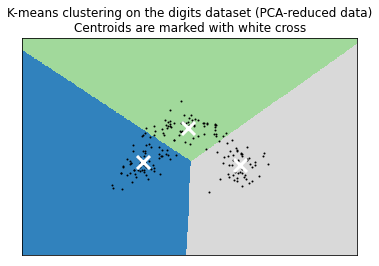

In [72]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=k, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ. 
h = .01 # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.tab20c, aspect="auto", origin="lower")
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()